**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycodestyle flake8 pycodestyle_magic
import seaborn as sns
from scipy import spatial
from scipy import stats
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#%load_ext pycodestyle_magic
from sklearn.neighbors import KDTree
from sklearn import metrics

In [3]:

#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self,n_neighbors=2,algorithm="brute"):
        self.k=n_neighbors
        self.algorithm=algorithm
    def fit(self, X, y):
        if y.shape[0]!=X.shape[0]:
            print ("wrong number")
        Xnp=np.array(X,dtype=float)
        self.X=Xnp
        self.y=y
        self.classes = np.unique(y)
        self.n_samples = Xnp.shape[0]
        self.n_features = Xnp.shape[1]
        if self.algorithm=='kd_tree':
            self.KDTree=KDTree(X)
       
   
    def euclid_dist(self,X, Y):
        #dstx = (X ** 2).sum(axis=1)
        #dsty = (Y ** 2).sum(axis=1)
        #dstxy = X.dot(Y.T)
        #dst = - 2 * dstxy + dsty + dstx.reshape(-1, 1)
       # dst = (X ** 2).sum(axis=1)[:, None] - 2 * X.dot(self.X.T) + (Y.T ** 2).sum(axis=0)
        return spatial.distance.cdist(X,Y,metric='minkowski')#metrics.pairwise.euclidean_distances(X,Y);#np.sqrt(dst)
   
   
    def  predict(self,X):
        res=np.zeros(np.shape(X)[0],dtype=int)
        a=spatial.distance.cdist(X,self.X,metric='minkowski')
        #ind=np.argsort(a,axis=1)[:,:self.k]
        ind=np.argpartition(a,self.k-1,axis=1)[:,:self.k]
        if self.algorithm == 'kd_tree':
            return stats.mode(self.y[self.KDTree.query(X, k=self.k, return_distance=False)],axis=1)[0].ravel()
        return stats.mode(self.y[ind],axis=1)[0].ravel()
   

             
   
    def predict_proba(self,X):
        res=np.zeros((len(X),len(np.unique(self.y))),dtype=float)
        a=self.euclid_dist(X,self.X)
        ind=np.argsort(a,axis=1)[:,:self.k]
        for column in self.y[ind].T:
            res[np.arange(len(X)),column]+=1
        return res/self.k
   
    
 
    def score(self,X, y):
        return np.mean(self.predict(X)==y)
        

**IRIS**

In [7]:
iris = datasets.load_iris()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 500 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [9]:
%time clf.predict(X_test)

Wall time: 1.5 ms


array([0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1])

In [10]:
%time my_clf.predict(X_test)

Wall time: 1e+03 µs


array([0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1])

In [11]:
%time clf.predict_proba(X_test)

Wall time: 1.5 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
%time my_clf.predict_proba(X_test)

Wall time: 1 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [13]:
clf.score(X_test, y_test)

0.8

In [14]:
my_clf.score(X_test, y_test)

0.8

Задание 3

best = 40, best score = 0.933


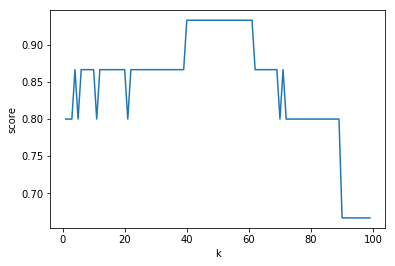

In [15]:
maxk = 100
res = np.empty(maxk - 1, dtype=float)
for k in range(1, maxk):
    plot = MyKNeighborsClassifier(n_neighbors=k)
    plot.fit(X_train, y_train)
    res[k - 1] = plot.score(X_test, y_test)

print('best = {}, best score = {:0.3}'.
      format(res.argmax()+1, res[res.argmax()+1]))

plt.figure()
plt.xlabel('k')
plt.ylabel('score')
plt.plot(np.arange(1, maxk), res)

In [20]:
#!pip install mlxtend
from mlxtend.data import loadlocal_mnist
X_train,y_train=loadlocal_mnist(images_path='./train-images.idx3-ubyte',labels_path='./train-labels.idx1-ubyte')
X_test,y_test=loadlocal_mnist(images_path='./t10k-images.idx3-ubyte',labels_path='./t10k-labels.idx1-ubyte')

**MNIST**

In [17]:
#mnist = fetch_mldata('MNIST original')

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [19]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [20]:
%time clf.fit(X_train, y_train)

Wall time: 5 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

Wall time: 209 ms


In [22]:
%time clf.predict(X_test)

Wall time: 24.3 s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [23]:
clf.score(X_test, y_test)

0.9627

In [ ]:
my_clf.score(X_test, y_test)

# не очень ясно
у меня на ноутбуке оперативная память 8 гб, плюс 4 гб свободно на диске С. При выполнении строк:
a=spatial.distance.cdist(X,self.X,metric='minkowski')
Возникает ошибка памяти, подробнее могу скинуть в слаке. В интернетах написано, что это происходит из за недостатка памяти на самом пк. Ошибка появляется только при работе с мнист, пк зависает, приходилось вручную прерывать и самому построчно разбираться. С ирисом все в порядке.
Посчитав, сколько занимает памяти матрица расстояний: 60000(X_train.shape)*59999//2*8 байт = примерно 14 гб, получается, что памяти действительно не хватает. 
Можно ли это как то исправить, помимо метода простого освобождения памяти, т к не очень хотелось бы...


In [21]:
X_train.shape

(60000, 784)

ошибка возникает при выполнении 
* out = kwargs.pop("out", None)
    * if out is None:
        *dm = np.empty((mA, mB), dtype=np.double)
 в файле distance.py        

Задание 4

In [9]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [11]:
%time clf.fit(X_train, y_train)

Wall time: 960 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [12]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [13]:
%time clf.predict(X_test)

Wall time: 1.5 ms


array([2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0])

In [14]:
%time my_clf.predict(X_test)

Wall time: 500 µs


array([2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0])

In [15]:
%time clf.predict_proba(X_test)

Wall time: 500 µs


array([[0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ]])

In [16]:
%time my_clf.predict_proba(X_test)

Wall time: 500 µs


array([[0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ]])

In [17]:
clf.score(X_test, y_test)

0.9333333333333333

In [18]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 5

In [ ]:
# seaborn библиотека для визуализации данных
# matplotlib библиотека для отображения графиков
# train_test_split разбивает данные на две части: тренировочную и тестовую
# Pipeline %load_ext  (from sklearn.pipeline import Pipeline)  для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler)  обнуляет среднее и приводит к единичной дисперсии
# ClassifierMixin миксин для всех классификаторов в sklearn
# NeighborsBase базовый класс для моделей соседей
# KNeighborsMixin миксин для моделей, работающих с k ближайшими соседями
# SupervisedIntegerMixin миксин для моделей,обучающихся с использованием X в качестве теста  и y в качестве таргета